In [54]:
#import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [55]:
#reading dataset
data=pd.read_csv("insurance.csv")

In [56]:
#Checking the first 10rows of dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [57]:
#Basic analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
#checking for null values and categorical value
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [59]:
#converting categorical value to numerical representative
data['sex']=data['sex'].apply({'female':0,'male':1}.get)

In [60]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [61]:
data['smoker']=data['smoker'].apply({'yes':0,'no':1}.get)

In [62]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,southwest,16884.92
1,18,1,33.8,1,1,southeast,1725.55
2,28,1,33.0,3,1,southeast,4449.46
3,33,1,22.7,0,1,northwest,21984.47
4,32,1,28.9,0,1,northwest,3866.86


In [63]:
data['region']=data['region'].apply({'southwest':0,'southeast':1,'northwest':2,'northeast':3}.get)

In [64]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


<Axes: >

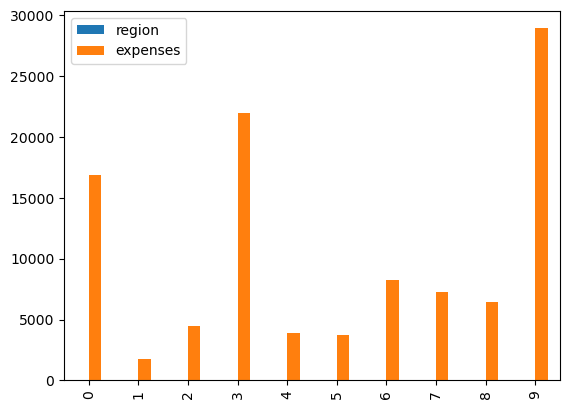

In [77]:
#visualizing the first 10 rows of dataset in the form of bargraph
df=data[['region','expenses']]
df.iloc[0:10, : ].plot(kind='bar')

<Axes: >

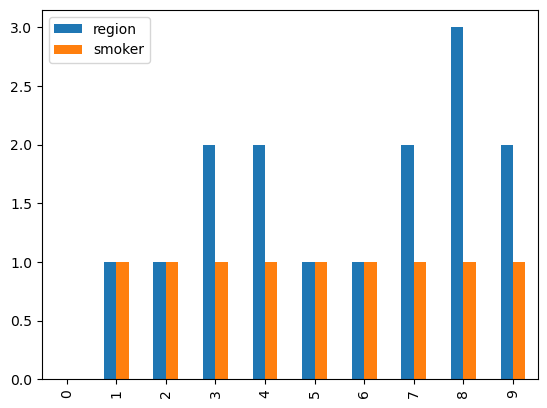

In [83]:
df=data[['region','smoker']]
df.iloc[0:10, : ].plot(kind='bar')

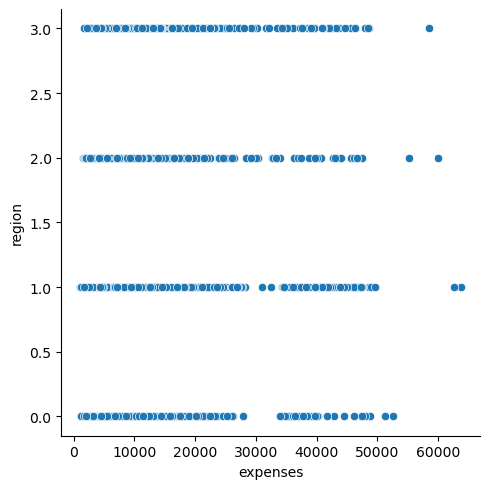

In [85]:
#visualizing using scatter plot/relational plot
snr.relplot(x='expenses',y='region',data=data)

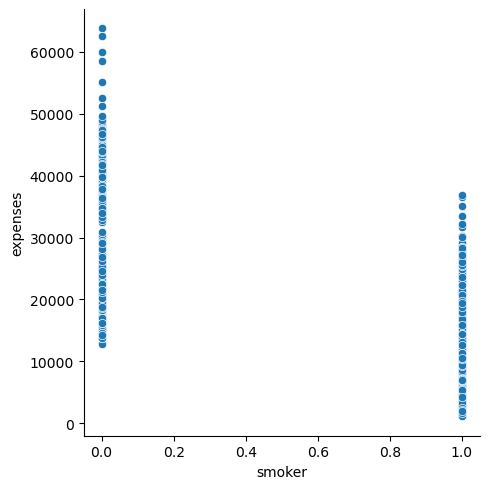

In [89]:
snr.relplot(y='expenses',x='smoker',data=data)

In [91]:
#dividing the data into dependent and independent variable
x=data.drop(['expenses'],axis=1)
y=data['expenses']

In [93]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,0,0
1,18,1,33.8,1,1,1
2,28,1,33.0,3,1,1
3,33,1,22.7,0,1,2
4,32,1,28.9,0,1,2


In [95]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85)

In [99]:
#creating a supervised model using linear regression algorithm
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [103]:
#training the model
model.fit(x_train,y_train)

LinearRegression()

In [109]:
#predict the model
y_hat=model.predict(x_test)

In [111]:
#accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(y_test,y_hat)

In [113]:
print(score)

0.8098183136849847


In [115]:
model.score(x,y)

0.7506318315226431